In [2]:
from scipy import signal, stats
import numpy as np
import pandas as pd
from matplotlib.pyplot import *

%matplotlib inline

In [3]:
## sampling rate of ganglion is 200Hz
fs = 200.0 

In [4]:
def extract_data(fname):
    d = pd.read_csv(fname)
    eeg = np.array(d.ix[:, 1:5])
    tag = np.array(d.Marker)
    start = np.where(tag == 1)[0][0]
    end = np.where(tag == 2)[0][0]
    eeg = eeg[start:end]
    return eeg

In [19]:
## get data
eeg1 = extract_data('../data/data_sintel_pierre_1.csv')
eeg2 = extract_data('../data/data_sintel_pierre_2.csv')

In [20]:
## data may be off by a few samples, so need to align
N_samp = min(len(eeg1), len(eeg2))
eeg1 = eeg1[:N_samp]
eeg2 = eeg2[:N_samp]

In [21]:
## filter signal to remove noise
b, a = signal.butter(2, (2/(fs/2), 20/(fs/2)), btype='bandpass')
eeg1 = signal.filtfilt(b, a, eeg1, axis=0)
eeg2 = signal.filtfilt(b, a, eeg2, axis=0)

In [22]:
## advance window of 200 samples
## take correlation between signals across each sample
window = 200
step = 25
corr = []
times = []

for start in np.arange(0, N_samp, step):
    end = start + window
    w1 = eeg1[start:end]
    w2 = eeg2[start:end]
    
    ## average the correlation across each channel
    r = 0
    for c in range(w1.shape[1]):
        r += stats.pearsonr(w1[:, c], w2[:, c])[0]
    r /= w1.shape[1]
    
    mid = (start+end)/2 # middle sample
    t = mid / fs # convert middle sample to time
    
    
    times.append(t)
    corr.append(r)

times = np.array(times)
corr = np.array(corr)

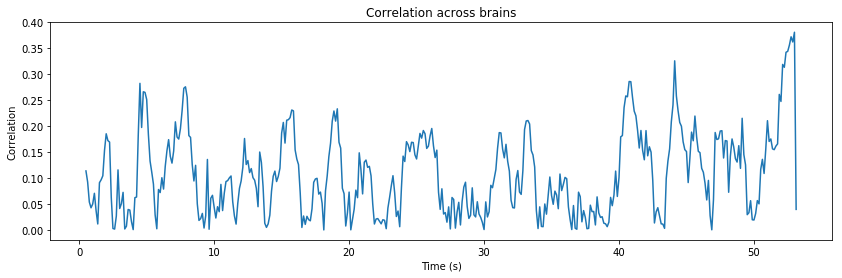

In [24]:
figure(figsize=(14,4))
plot(times, np.abs(corr))
xlabel('Time (s)')
ylabel('Correlation')
_ = title('Correlation across brains')